In [16]:
from google.cloud import bigquery
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

PROJECT_ID = 'bda-gameon-demo'
DATASET_ID = "cricket"
TABLE_ID = "historic_data"

In [2]:
def read_bigquery_to_dataframe(project_id, dataset_id, table_id):
    """
    Read a BigQuery table into a pandas DataFrame.
    
    :param project_id: Google Cloud project ID
    :param dataset_id: BigQuery dataset ID
    :param table_id: BigQuery table ID
    :return: pandas DataFrame
    """
    client = bigquery.Client(project=project_id)
    table = f"{project_id}.{dataset_id}.{table_id}"
    query = f"SELECT * FROM `{table}`"
    df = client.query(query).to_dataframe()
    
    return df

df = read_bigquery_to_dataframe(PROJECT_ID, DATASET_ID, TABLE_ID)
df.head()

,inning,over,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,cumulative_score,cumulative_wickets,...,team_2_player_4,team_2_player_5,team_2_player_6,team_2_player_7,team_2_player_8,team_2_player_9,team_2_player_10,team_2_player_11,run_rate,required_run_rate
0,1,0,SV Samson,M Jansen,Abhishek Sharma,0,0,0,2,0,...,H Klaasen,DA Miller,PE Kruger,M Jansen,A Simelane,G Coetzee,KA Maharaj,N Peter,2.0,0.0
1,1,1,Abhishek Sharma,AK Markram,SV Samson,0,0,0,12,0,...,H Klaasen,DA Miller,PE Kruger,M Jansen,A Simelane,G Coetzee,KA Maharaj,N Peter,6.0,0.0
2,1,2,SV Samson,KA Maharaj,Abhishek Sharma,0,0,0,24,0,...,H Klaasen,DA Miller,PE Kruger,M Jansen,A Simelane,G Coetzee,KA Maharaj,N Peter,8.0,0.0
3,1,3,SA Yadav,G Coetzee,SV Samson,6,0,6,34,1,...,H Klaasen,DA Miller,PE Kruger,M Jansen,A Simelane,G Coetzee,KA Maharaj,N Peter,8.5,0.0
4,1,4,SA Yadav,M Jansen,SV Samson,0,0,0,49,1,...,H Klaasen,DA Miller,PE Kruger,M Jansen,A Simelane,G Coetzee,KA Maharaj,N Peter,9.8,0.0


In [44]:
df.describe()

,inning,over,runs_batter,runs_extras,runs_total,cumulative_score,cumulative_wickets,winner,toss_decision,toss_winner,season,current_team,first_inning_total_score,first_inning_total_wickets,first_inning_run_rate,run_rate,required_run_rate,runs_per_over,wickets_per_over,match_id
count,87313.0,87313.0,87313.0,87313.0,87313.0,87313.0,87313.0,87313.0,87313.0,87313.0,87313.000000,87313.0,87313.0,87313.0,87313.000000,87313.000000,87313.000000,87313.0,87313.0,87313.0
mean,1.470858,8.99417,1.155132,0.026926,1.182058,71.530368,2.975674,0.488908,0.535293,0.535293,1494.681937,0.470858,72.401395,3.21203,3.647827,7.041961,4.642010,7.45834,0.350566,1199.946801
std,0.499153,5.629941,1.547488,0.235436,1.545475,46.71513,2.396889,0.49988,0.498756,0.498756,500.202591,0.499153,81.065272,3.706684,4.073283,2.314978,8.483777,4.715785,0.575309,677.509545
min,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1004.500000,0.0,0.0,0.0,0.000000,0.000000,-6.000000,-125.0,-5.0,1.0
25%,1.0,4.0,0.0,0.0,0.0,33.0,1.0,0.0,0.0,0.0,1020.500000,0.0,0.0,0.0,0.000000,5.571429,0.000000,4.0,0.0,615.0
50%,1.0,9.0,1.0,0.0,1.0,66.0,3.0,0.0,1.0,1.0,1023.500000,0.0,0.0,0.0,0.000000,7.000000,0.000000,7.0,0.0,1204.0
75%,2.0,14.0,1.0,0.0,1.0,103.0,4.0,1.0,1.0,1.0,2022.000000,1.0,151.0,7.0,7.600000,8.428571,8.000000,10.0,1.0,1788.0
max,2.0,19.0,6.0,6.0,6.0,344.0,10.0,1.0,1.0,1.0,2024.000000,1.0,344.0,10.0,17.200000,26.000000,174.000000,170.0,7.0,2364.0


In [39]:
df['new_match'] = (df['over'] == 0) & (df['inning'] == 1)
df['match_id'] = df['new_match'].cumsum()
df

,inning,over,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,cumulative_score,cumulative_wickets,...,team_2_player_8,team_2_player_9,team_2_player_10,team_2_player_11,run_rate,required_run_rate,runs_per_over,wickets_per_over,new_match,match_id
0,1,0,SV Samson,M Jansen,Abhishek Sharma,0,0,0,2,0,...,A Simelane,G Coetzee,KA Maharaj,N Peter,2.000000,0.000000,2,0,True,1
1,1,1,Abhishek Sharma,AK Markram,SV Samson,0,0,0,12,0,...,A Simelane,G Coetzee,KA Maharaj,N Peter,6.000000,0.000000,10,0,False,1
2,1,2,SV Samson,KA Maharaj,Abhishek Sharma,0,0,0,24,0,...,A Simelane,G Coetzee,KA Maharaj,N Peter,8.000000,0.000000,12,0,False,1
3,1,3,SA Yadav,G Coetzee,SV Samson,6,0,6,34,1,...,A Simelane,G Coetzee,KA Maharaj,N Peter,8.500000,0.000000,10,1,False,1
4,1,4,SA Yadav,M Jansen,SV Samson,0,0,0,49,1,...,A Simelane,G Coetzee,KA Maharaj,N Peter,9.800000,0.000000,15,0,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87308,2,14,Kushal Malla,J Drysdale,K Bhurtel,1,0,1,123,2,...,DS Airee,Sompal Kami,LN Rajbanshi,R Dhakal,8.200000,6.600000,9,0,False,2364
87309,2,15,K Bhurtel,Jasdeep Singh,Kushal Malla,2,0,2,134,2,...,DS Airee,Sompal Kami,LN Rajbanshi,R Dhakal,8.375000,5.500000,11,0,False,2364
87310,2,16,Kushal Malla,Harmeet Singh,K Bhurtel,1,0,1,145,2,...,DS Airee,Sompal Kami,LN Rajbanshi,R Dhakal,8.529412,3.666667,11,0,False,2364
87311,2,17,Kushal Malla,SN Netravalkar,K Bhurtel,2,0,2,153,2,...,DS Airee,Sompal Kami,LN Rajbanshi,R Dhakal,8.500000,1.500000,8,0,False,2364


#### Average over score and wickets by innings

In [45]:
df['runs_per_over'] = df.groupby(['match_id', 'inning'])['cumulative_score'].diff().fillna(df['cumulative_score'])
df['wickets_per_over'] = df.groupby(['match_id', 'inning'])['cumulative_wickets'].diff().fillna(df['cumulative_wickets'])

mean_over_score = df.groupby('inning')['runs_per_over'].mean().round(2).to_dict()
mean_over_wickets = df.groupby('inning')['wickets_per_over'].mean().round(2).to_dict()

mean_over_score, mean_over_wickets

({1: 7.61, 2: 7.29}, {1: 0.36, 2: 0.34})

#### Toss decision

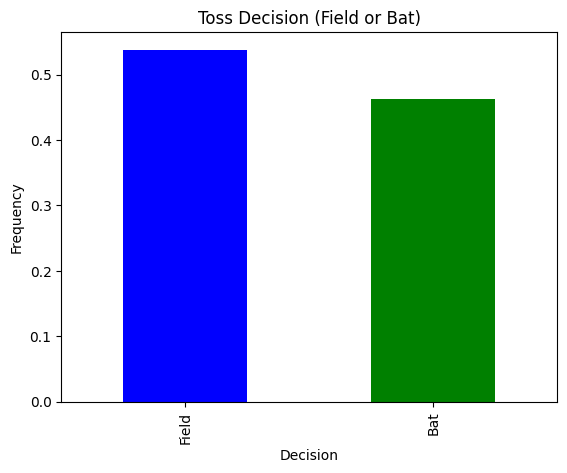

In [51]:
toss_decisions = df[df["new_match"] == 1]['toss_decision'].value_counts()
toss_decisions = toss_decisions / toss_decisions.sum()
toss_decisions.index = ['Field', 'Bat']
toss_decisions.plot(kind='bar', color=['blue', 'green'])
plt.title("Toss Decision (Field or Bat)")
plt.xlabel("Decision")
plt.ylabel("Frequency")
plt.show()

#### Average cumulative runs

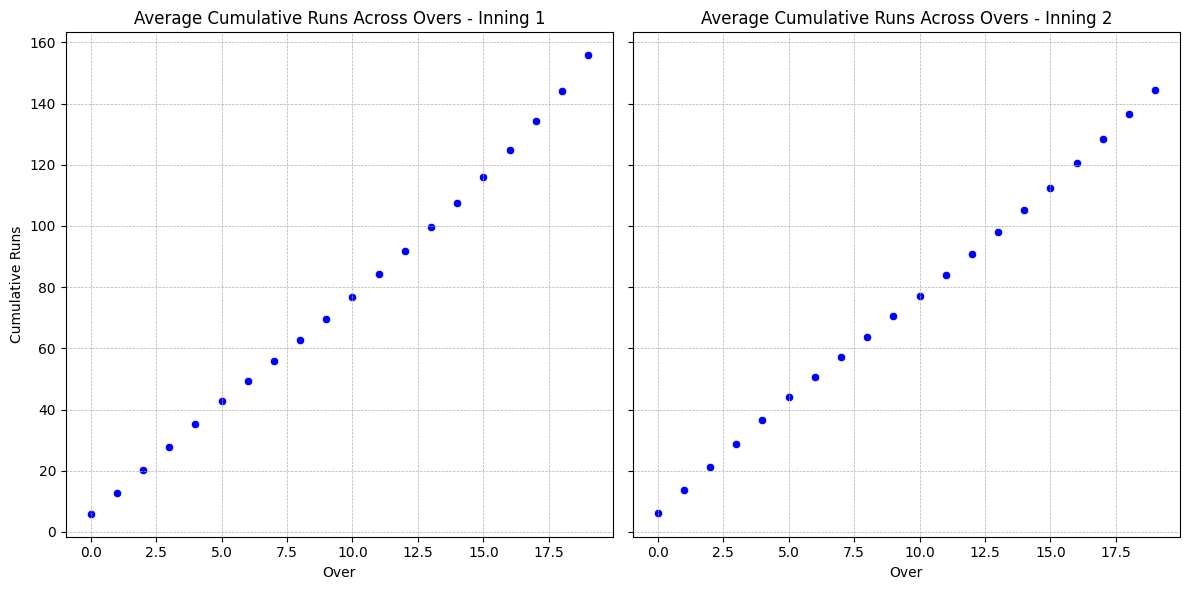

In [31]:
inning_1_runs = df[df['inning'] == 1].groupby('over')['cumulative_score'].mean()
inning_2_runs = df[df['inning'] == 2].groupby('over')['cumulative_score'].mean()

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

sns.scatterplot(x=inning_1_runs.index, y=inning_1_runs.values, color='blue', ax=axes[0])
axes[0].set_title("Average Cumulative Runs Across Overs - Inning 1")
axes[0].set_xlabel("Over")
axes[0].set_ylabel("Cumulative Runs")
axes[0].grid(True, which='major', linestyle='--', linewidth=0.5)

sns.scatterplot(x=inning_2_runs.index, y=inning_2_runs.values, color='blue', ax=axes[1])
axes[1].set_title("Average Cumulative Runs Across Overs - Inning 2")
axes[1].set_xlabel("Over")
axes[1].grid(True, which='major', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

In [54]:
inning_1_runs[19], inning_2_runs[19]

(155.7747619047619, 144.28682170542635)

#### Average cumulative wickets

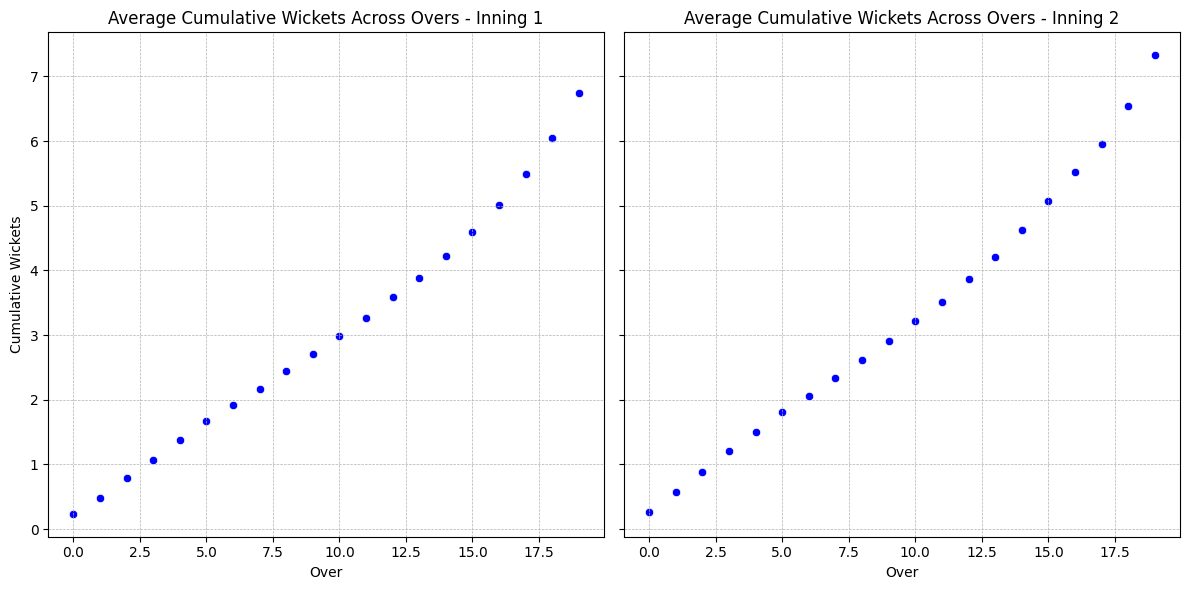

In [32]:
inning_1_wickets = df[df['inning'] == 1].groupby('over')['cumulative_wickets'].mean()
inning_2_wickets = df[df['inning'] == 2].groupby('over')['cumulative_wickets'].mean()

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

sns.scatterplot(x=inning_1_wickets.index, y=inning_1_wickets.values, color='blue', ax=axes[0])
axes[0].set_title("Average Cumulative Wickets Across Overs - Inning 1")
axes[0].set_xlabel("Over")
axes[0].set_ylabel("Cumulative Wickets")
axes[0].grid(True, which='major', linestyle='--', linewidth=0.5)

sns.scatterplot(x=inning_2_wickets.index, y=inning_2_wickets.values, color='blue', ax=axes[1])
axes[1].set_title("Average Cumulative Wickets Across Overs - Inning 2")
axes[1].set_xlabel("Over")
axes[1].grid(True, which='major', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

In [55]:
inning_1_wickets[19], inning_2_wickets[19]

(6.748571428571428, 7.3265503875969)

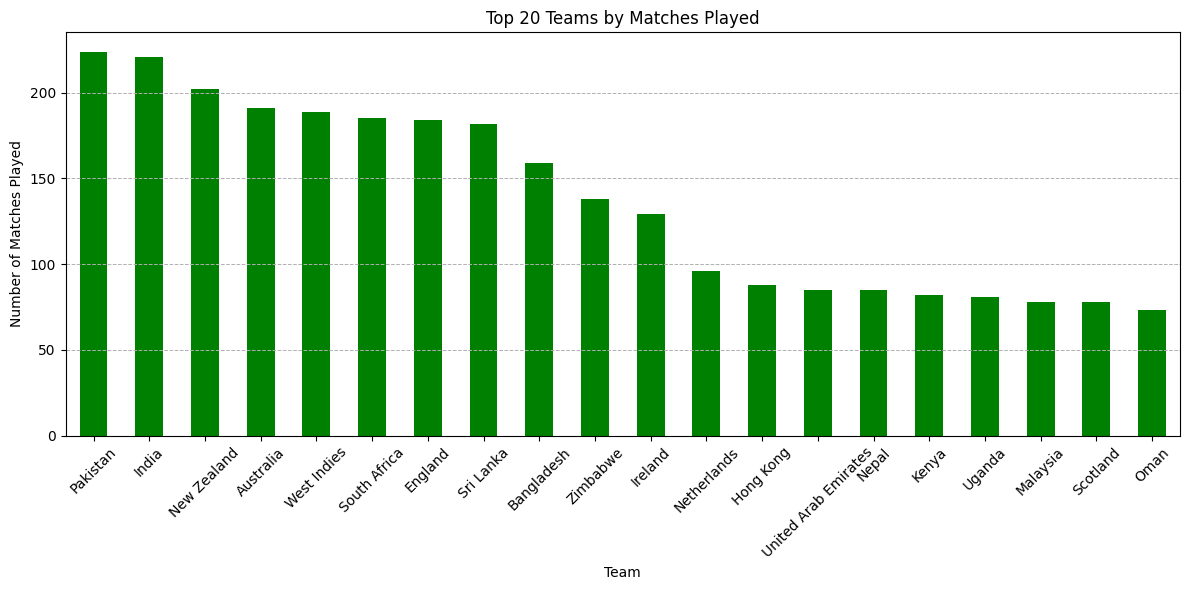

In [43]:
teams_played = pd.concat([df[['match_id', 'team_1']].rename(columns={'team_1': 'team'}),
                          df[['match_id', 'team_2']].rename(columns={'team_2': 'team'})])
matches_per_team = teams_played.groupby('team')['match_id'].nunique().sort_values(ascending=False)

top_20_teams = matches_per_team.head(20)
top_20_teams.plot(kind='bar', figsize=(12, 6), color='green')
plt.title("Top 20 Teams by Matches Played")
plt.xlabel("Team")
plt.ylabel("Number of Matches Played")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()
